# Project Name: Bank Customer Churn Prediction using H2O Auto ML

 
### 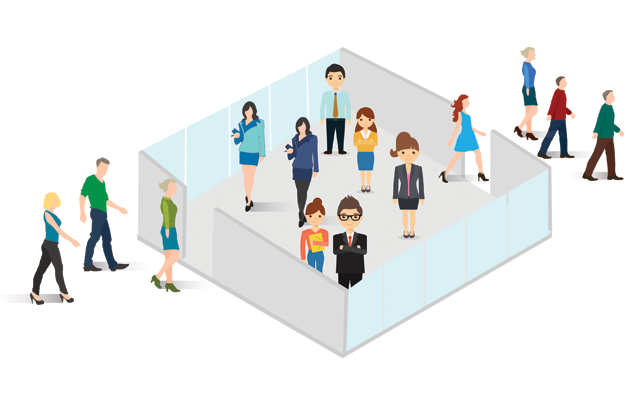

## Context: 
### In general, churn is expressed as a degree of customer inactivity or disengagement, observed over a given time. This manifests within the data in various forms such as the recency of account actions or change in the account balance

## Aim:
### We aim to accomplist the following for this study:

- Identify and visualize which factors contribute to customer churn:

### Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not
- Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

## We will be using ANN models and H2O Auto ML in this project

## Time Line of the Project:
- Data Analysis
- Feature Engineering
- Model Building using ANN 
- Model Building and Prediction using H2O Auto ML

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("./Churn_Modelling.csv")

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [5]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#Data Analysis

In [7]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [8]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

## We will plot a Pie Chart 

In [9]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

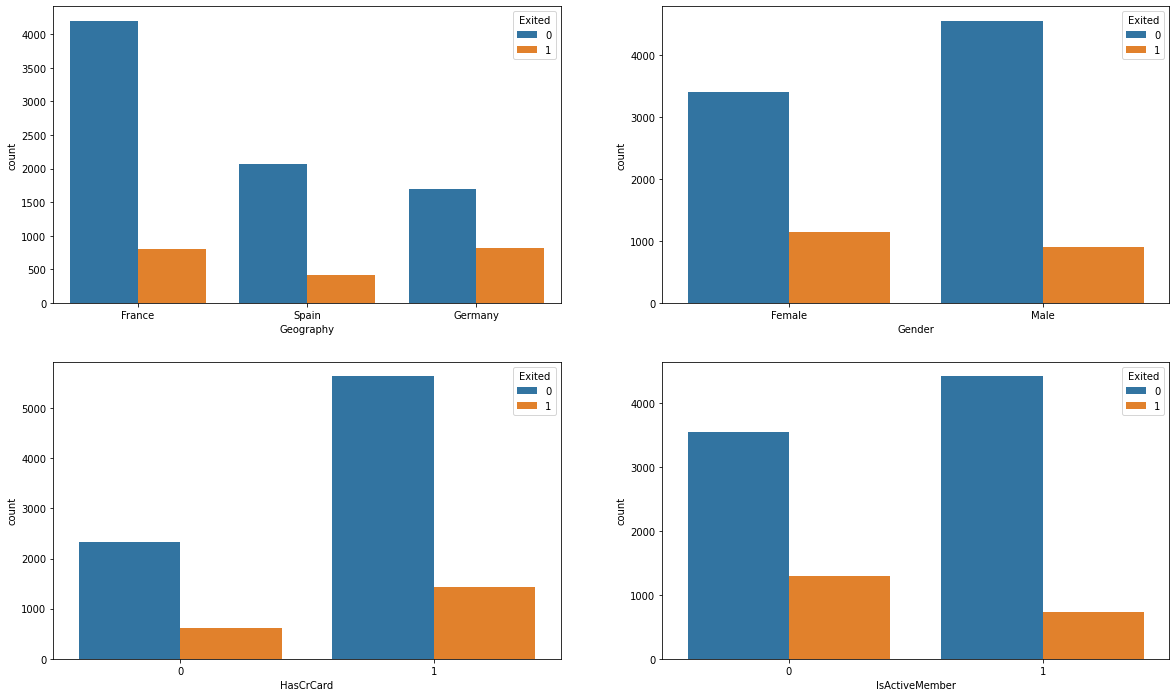

In [11]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

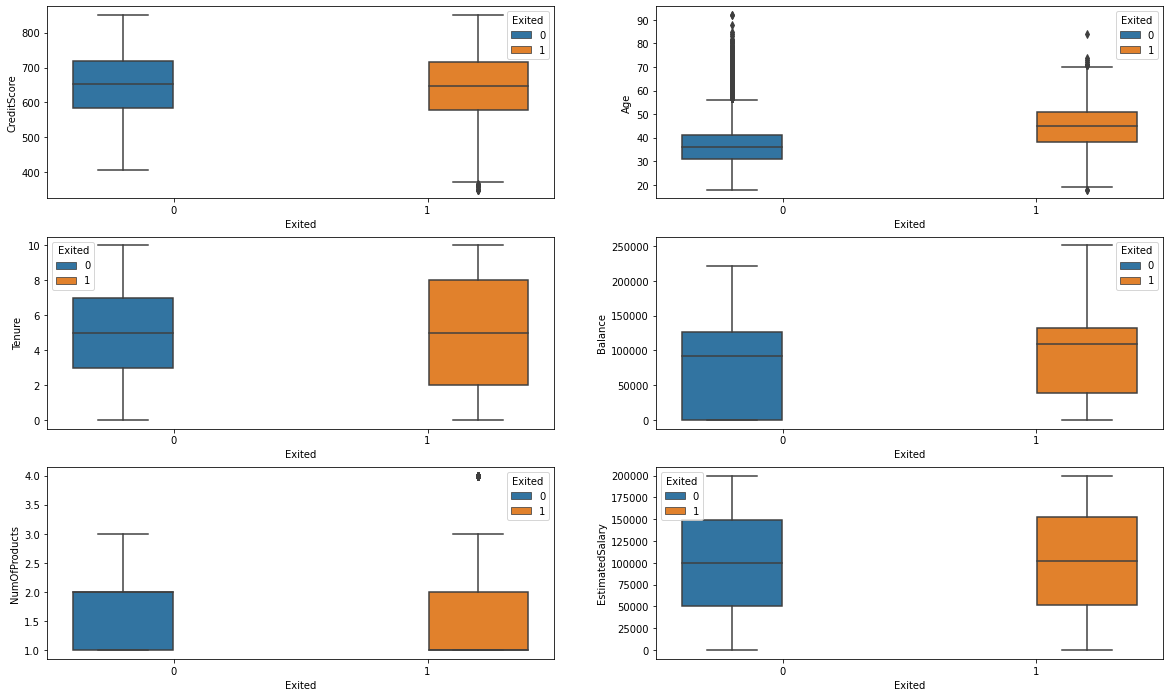

In [12]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [13]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

## Feature Engineering

### Making a new column BalanceSalaryRatio

(-1.0, 5.0)

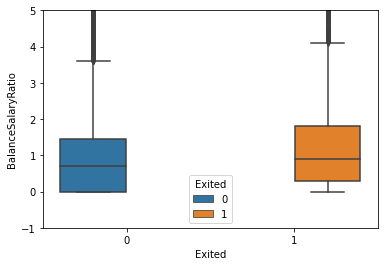

In [14]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

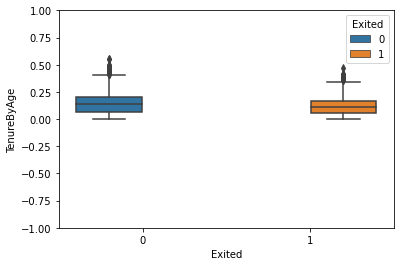

In [15]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

#### Printing the categorical variables

In [16]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [17]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


### Label Encoding

In [18]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

### One Hot Encoding method

In [19]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  BalanceSalaryRatio  TenureByAge  \
0               1        101348.88       1            0.000000     0.047619   
1               1        112542.58       0            0.744677     0.024390   
2               0        113931.57       1            1.401375     0.190476   
3               0         93826.63       0            0.000000     0.025641   
4               1         79084.10       0            1.587055     0.046512   

   Geography_France  Geography_Germany  Geography_Spain  
0                 1                  0                0  
1                 0                  0                1  
2                 1                  0                0  
3                 1                  0                0  
4                 0                  0                1

In [20]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [21]:
df1.head()

CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538       0  0.324324     0.2  0.000000       0.000000          1   
1        0.516       0  0.310811     0.1  0.334031       0.000000          0   
2        0.304       0  0.324324     0.8  0.636357       0.666667          1   
3        0.698       0  0.283784     0.1  0.000000       0.333333          0   
4        1.000       0  0.337838     0.2  0.500246       0.000000          1   

   IsActiveMember  EstimatedSalary  Exited  BalanceSalaryRatio  TenureByAge  \
0               1         0.506735       1            0.000000     0.047619   
1               1         0.562709       0            0.744677     0.024390   
2               0         0.569654       1            1.401375     0.190476   
3               0         0.469120       0            0.000000     0.025641   
4               1         0.395400       0            1.587055     0.046512   

   Geography_France  Geography_Germany  Geography_Spain  
0                 1                  0                0  
1                 0                  0                1  
2                 1                  0                0  
3                 1                  0                0  
4                 0                  0                1

In [22]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [23]:
len(X_train.columns)

14

## Model Building and Prediction

## The Sequential model

### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

## A Sequential model is not appropriate when:

-Your model has multiple inputs or multiple outputs
-Any of your layers has multiple inputs or multiple outputs
-You need to do layer sharing
-You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [24]:
X_train.shape

(8000, 14)

In [25]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(None,14), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

c:\Users\Mehdi\AppData\Local\Programs\Python\Python38\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Epoch 1/100
250/250 [==============================] - 1s 589us/step - loss: 0.5757 - accuracy: 0.7639
Epoch 2/100
250/250 [==============================] - 0s 578us/step - loss: 0.4860 - accuracy: 0.7946
Epoch 3/100
250/250 [==============================] - 0s 570us/step - loss: 0.5074 - accuracy: 0.7935
Epoch 4/100
250/250 [==============================] - 0s 586us/step - loss: 0.4636 - accuracy: 0.7966
Epoch 5/100
250/250 [==============================] - 0s 585us/step - loss: 0.4533 - accuracy: 0.8034
Epoch 6/100
250/250 [==============================] - 0s 566us/step - loss: 0.4819 - accuracy: 0.8049
Epoch 7/100
250/250 [==============================] - 0s 562us/step - loss: 0.4379 - accuracy: 0.8121
Epoch 8/100
250/250 [==============================] - 0s 578us/step - loss: 0.4921 - accuracy: 0.8094
Epoch 9/100
250/250 [==============================] - 0s 562us/step - loss: 0.4666 - accuracy: 0.8123
Epoch 10/100
250/250 [==============================] - 0s 564us/step - l

In [26]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 549us/step - loss: 0.3601 - accuracy: 0.8465


[0.36013609170913696, 0.8464999794960022]

In [27]:
yp = model.predict(X_test)
yp

63/63 [==============================] - 0s 500us/step


array([[0.02358571],
       [0.08849031],
       [0.07351334],
       ...,
       [0.01204323],
       [0.01429178],
       [0.08208451]], dtype=float32)

### Converting our predictions to 0,1 to check accuracy

In [28]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
y_pred  

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Checking the accuracy 

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.70      0.42      0.53       405

    accuracy                           0.85      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



Text(69.0, 0.5, 'Truth')

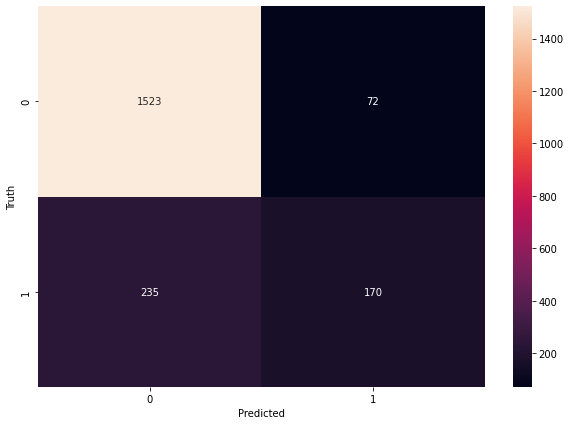

In [31]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  84.65 %


# Using Auto ML

1_S6kE_nwoge5m7ok1onsjsQ.png

### H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.

### Installing H2O Auto ML

In [34]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [35]:
!pip install h2o

     -------------------------------------- 177.2/177.2 MB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for h2o: filename=h2o-3.38.0.1-py2.py3-none-any.whl size=177276478 sha256=0719aed211aacb1b0383e10d080ab6dddebc94a879f73cb0a168625b38614856
  Stored in directory: c:\users\mehdi\appdata\local\pip\cache\wheels\51\91\49\126d827f001a62a462df56cb6d9acaf7ff8c3c0b0e2e48ef13
Successfully built h2o


## Importing the h2o Python module and H2OAutoML class

In [36]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.341-b10, mixed mode)
  Starting server from C:\Users\Mehdi\AppData\Local\Programs\Python\Python38\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Mehdi\AppData\Local\Temp\tmpmrdh_m4y
  JVM stdout: C:\Users\Mehdi\AppData\Local\Temp\tmpmrdh_m4y\h2o_Mehdi_started_from_python.out
  JVM stderr: C:\Users\Mehdi\AppData\Local\Temp\tmpmrdh_m4y\h2o_Mehdi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       America/Los_Angeles
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.1
H2O_cluster_version_age:    16 days
H2O_cluster_name:           H2O_from_python_Mehdi_hyfkei
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    14.22 Gb
H2O_cluster_total_cores:    16
H2O_cluster_allowed_cores:  16
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.5 final
--------------------------  -----------------------------

### Loading the data

In [37]:
df = h2o.import_file("./Churn_Modelling.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [38]:
df.head()

RowNumber    CustomerId  Surname      CreditScore  Geography    Gender      Age    Tenure    Balance    NumOfProducts    HasCrCard    IsActiveMember    EstimatedSalary    Exited
-----------  ------------  ---------  -------------  -----------  --------  -----  --------  ---------  ---------------  -----------  ----------------  -----------------  --------
          1   1.56346e+07  Hargrave             619  France       Female       42         2        0                  1            1                 1           101349           1
          2   1.56473e+07  Hill                 608  Spain        Female       41         1    83807.9                1            0                 1           112543           0
          3   1.56193e+07  Onio                 502  France       Female       42         8   159661                  3            1                 0           113932           1
          4   1.57014e+07  Boni                 699  France       Female       39         1        0                  2            0                 0            93826.6         0
          5   1.57379e+07  Mitchell             850  Spain        Female       43         2   125511                  1            1                 1            79084.1         0
          6   1.5574e+07   Chu                  645  Spain        Male         44         8   113756                  2            1                 0           149757           1
          7   1.55925e+07  Bartlett             822  France       Male         50         7        0                  2            1                 1            10062.8         0
          8   1.56561e+07  Obinna               376  Germany      Female       29         4   115047                  4            1                 0           119347           1
          9   1.57924e+07  He                   501  France       Male         44         4   142051                  2            0                 1            74940.5         0
         10   1.55924e+07  H?                   684  France       Male         27         2   134604                  1            1                 1            71725.7         0
[10 rows x 14 columns]

## H2O auto ml can do all the data preprocessing techniques

In [39]:
df_train,df_test= df.split_frame(ratios=[.8])

### Splitting the data

In [40]:
df_train

RowNumber    CustomerId  Surname      CreditScore  Geography    Gender      Age    Tenure    Balance    NumOfProducts    HasCrCard    IsActiveMember    EstimatedSalary    Exited
-----------  ------------  ---------  -------------  -----------  --------  -----  --------  ---------  ---------------  -----------  ----------------  -----------------  --------
          2   1.56473e+07  Hill                 608  Spain        Female       41         1    83807.9                1            0                 1          112543            0
          5   1.57379e+07  Mitchell             850  Spain        Female       43         2   125511                  1            1                 1           79084.1          0
          9   1.57924e+07  He                   501  France       Male         44         4   142051                  2            0                 1           74940.5          0
         10   1.55924e+07  H?                   684  France       Male         27         2   134604                  1            1                 1           71725.7          0
         11   1.57678e+07  Bearce               528  France       Male         31         6   102017                  2            0                 0           80181.1          0
         12   1.57372e+07  Andrews              497  Spain        Male         24         3        0                  2            1                 0           76390            0
         14   1.56915e+07  Chin                 549  France       Female       25         5        0                  2            0                 0          190858            0
         15   1.56009e+07  Scott                635  Spain        Female       35         7        0                  2            1                 1           65951.6          0
         16   1.5644e+07   Goforth              616  Germany      Male         45         3   143129                  2            0                 1           64327.3          0
         17   1.57375e+07  Romeo                653  Germany      Male         58         1   132603                  1            1                 0            5097.67         1
[7960 rows x 14 columns]

In [41]:
y = "Exited"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

### Defining the model

In [42]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

### Fitting the model

In [43]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
09:16:02.690: Project: AutoML_1_20221006_91602
09:16:02.691: Setting stopping tolerance adaptively based on the training frame: 0.011208395991555507
09:16:02.691: Build control seed: 10
09:16:02.691: training frame: Frame key: AutoML_1_20221006_91602_training_py_3_sid_843d    cols: 14    rows: 7960  chunks: 64    size: 612298  checksum: -712786854257530394
09:16:02.691: validation frame: NULL
09:16:02.691: leaderboard frame: NULL
09:16:02.691: blending frame: NULL
09:16:02.691: response column: Exited
09:16:02.691: fold column: null
09:16:02.691: weights column: null
09:16:02.702: AutoML: XGBoost is not available; skipping it.
09:16:02.706: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20221006_91602

No summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07869760574696229
RMSE: 0.28053093545447405
MAE: 0.18036125414897133
RMSLE: 0.1955290205607803
Mean Residual Deviance: 0.07869760574696229
R^2: 0.5090643193172351
Null degrees of freedom: 7959
Residual degrees of freedom: 7951
Null deviance: 1275.997989949751
Residual deviance: 626.4329417458198
AIC: 2374.0467780754325

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10219147631802135
RMSE: 0.31967401570665915
MAE: 0.20959308967953288
RMSLE: 0.2245892850043775
Mean Residual Deviance: 0.10219147631802135
R^2: 0.3625035792388004
Null degrees of freedom: 7959
Residual degrees of freedom: 7952
Null deviance: 1276.9843467810297
Residual deviance: 813.4441514914499
AIC: 4451.4816755492375

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid
----------------------  --------  ----------  ------------  ------------
mae                     0.210038  0.00428462  0.207008      0.213068
mean_residual_deviance  0.102143  0.00422927  0.0991522     0.105133
mse                     0.102143  0.00422927  0.0991522     0.105133
null_deviance           638.492   33.4674     614.827       662.157
r2                      0.362523  0.00473014  0.365868      0.359179
residual_deviance       406.684   24.344      389.47        423.898
rmse                    0.319564  0.00661726  0.314885      0.324243
rmsle                   0.224513  0.00373125  0.221874      0.227151

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

### Seeing the Leaderboard

In [44]:
lb = aml.leaderboard

In [45]:
lb

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
------------------------------------------------------  --------  --------  --------  --------  ------------------------
StackedEnsemble_AllModels_1_AutoML_1_20221006_91602     0.319674  0.102191  0.209593  0.224589                  0.102191
StackedEnsemble_BestOfFamily_1_AutoML_1_20221006_91602  0.320916  0.102987  0.211712  0.225809                  0.102987
GBM_1_AutoML_1_20221006_91602                           0.321928  0.103638  0.215328  0.226544                  0.103638
GBM_2_AutoML_1_20221006_91602                           0.322072  0.10373   0.211036  0.226204                  0.10373
GBM_5_AutoML_1_20221006_91602                           0.322123  0.103764  0.212298  0.226062                  0.103764
GBM_3_AutoML_1_20221006_91602                           0.323046  0.104358  0.214456  0.22723                   0.104358
GBM_4_AutoML_1_20221006_91602                           0.325691  0.106075  0.213261  0.229485                  0.106075
GBM_grid_1_AutoML_1_20221006_91602_model_1              0.32659   0.106661  0.22981   0.229563                  0.106661
DRF_1_AutoML_1_20221006_91602                           0.328093  0.107645  0.216228  0.231905                  0.107645
DeepLearning_1_AutoML_1_20221006_91602                  0.334559  0.11193   0.224259  0.234679                  0.11193
[12 rows x 6 columns]

## Getting all the model ids

In [46]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [47]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20221006_91602',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20221006_91602',
 'GBM_1_AutoML_1_20221006_91602',
 'GBM_2_AutoML_1_20221006_91602',
 'GBM_5_AutoML_1_20221006_91602',
 'GBM_3_AutoML_1_20221006_91602',
 'GBM_4_AutoML_1_20221006_91602',
 'GBM_grid_1_AutoML_1_20221006_91602_model_1',
 'DRF_1_AutoML_1_20221006_91602',
 'DeepLearning_1_AutoML_1_20221006_91602',
 'XRT_1_AutoML_1_20221006_91602',
 'GLM_1_AutoML_1_20221006_91602']

In [48]:
aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.10228212515513435
RMSE: 0.3198157675211376
MAE: 0.20676838313739568
RMSLE: 0.22425329212650558
Mean Residual Deviance: 0.10228212515513435
R^2: 0.3963669299468531
Null degrees of freedom: 2039
Residual degrees of freedom: 2031
Null deviance: 346.16734930936104
Residual deviance: 208.65553531647407
AIC: 1158.0276995209615

### Getting the model details for best performing model

In [49]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20221006_91602

No summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07869760574696229
RMSE: 0.28053093545447405
MAE: 0.18036125414897133
RMSLE: 0.1955290205607803
Mean Residual Deviance: 0.07869760574696229
R^2: 0.5090643193172351
Null degrees of freedom: 7959
Residual degrees of freedom: 7951
Null deviance: 1275.997989949751
Residual deviance: 626.4329417458198
AIC: 2374.0467780754325

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10219147631802135
RMSE: 0.31967401570665915
MAE: 0.20959308967953288
RMSLE: 0.2245892850043775
Mean Residual Deviance: 0.10219147631802135
R^2: 0.3625035792388004
Null degrees of freedom: 7959
Residual degrees of freedom: 7952
Null deviance: 1276.9843467810297
Residual deviance: 813.4441514914499
AIC: 4451.4816755492375

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid
----------------------  --------  ----------  ------------  ------------
mae                     0.210038  0.00428462  0.207008      0.213068
mean_residual_deviance  0.102143  0.00422927  0.0991522     0.105133
mse                     0.102143  0.00422927  0.0991522     0.105133
null_deviance           638.492   33.4674     614.827       662.157
r2                      0.362523  0.00473014  0.365868      0.359179
residual_deviance       406.684   24.344      389.47        423.898
rmse                    0.319564  0.00661726  0.314885      0.324243
rmsle                   0.224513  0.00373125  0.221874      0.227151

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [50]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_1_AutoML_1_20221006_91602',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_1_AutoML_1_20221006_91602'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221006_91602_training_py_3_sid_843d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221006_91602_training_py_3_sid_843d'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221006_91602_training_py_3_sid_843d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221006_91602_training_py_3_sid_843d'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_na

In [51]:
#output.varimp_plot()

In [52]:
aml.leader

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20221006_91602

No summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07869760574696229
RMSE: 0.28053093545447405
MAE: 0.18036125414897133
RMSLE: 0.1955290205607803
Mean Residual Deviance: 0.07869760574696229
R^2: 0.5090643193172351
Null degrees of freedom: 7959
Residual degrees of freedom: 7951
Null deviance: 1275.997989949751
Residual deviance: 626.4329417458198
AIC: 2374.0467780754325

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10219147631802135
RMSE: 0.31967401570665915
MAE: 0.20959308967953288
RMSLE: 0.2245892850043775
Mean Residual Deviance: 0.10219147631802135
R^2: 0.3625035792388004
Null degrees of freedom: 7959
Residual degrees of freedom: 7952
Null deviance: 1276.9843467810297
Residual deviance: 813.4441514914499
AIC: 4451.4816755492375

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid
----------------------  --------  ----------  ------------  ------------
mae                     0.210038  0.00428462  0.207008      0.213068
mean_residual_deviance  0.102143  0.00422927  0.0991522     0.105133
mse                     0.102143  0.00422927  0.0991522     0.105133
null_deviance           638.492   33.4674     614.827       662.157
r2                      0.362523  0.00473014  0.365868      0.359179
residual_deviance       406.684   24.344      389.47        423.898
rmse                    0.319564  0.00661726  0.314885      0.324243
rmsle                   0.224513  0.00373125  0.221874      0.227151

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [53]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [54]:
y_pred

predict
---------
0.282871
0.945573
0.100719
0.132461
0.0384811
0.97897
0.0437899
0.0949151
0.699253
0.0352211
[2040 rows x 1 column]

In [57]:
print("Accuracy score for H2O is: ", output.model_performance(df_test),"%")

Accuracy score for H2O is:  ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.10228212515513435
RMSE: 0.3198157675211376
MAE: 0.20676838313739568
RMSLE: 0.22425329212650558
Mean Residual Deviance: 0.10228212515513435
R^2: 0.3963669299468531
Null degrees of freedom: 2039
Residual degrees of freedom: 2031
Null deviance: 346.16734930936104
Residual deviance: 208.65553531647407
AIC: 1158.0276995209615 %


In [58]:
df_test.shape

(2040, 14)

In [72]:
len(y_pred)

2040

In [81]:
print("Accuracy score for H2O is: ", (1 - (df_test['Exited'] - y_pred.round()).sum()/len(y_pred))*100,"%") 

Accuracy score for H2O is:  91.81372549019608 %


## Comparison between AutoML and FFNN

* The accuracy from NN is 85% while the accuracy for H2O is 92%
* However, the NN can be tuned to perform better.